# Churn Analysis
The objective of this case study is to use supervised learning-based models to predict a classification-based model to predict churn.

# Content

* [1. Introduction](#1)
* [2. Business Understanding](#2)
* [3. Data Understanding](#3)
    * [3.1 Load Libraries](#3.1)    
    * [3.2. Load Dataset](#3.2)
    * [3.3. Exploratory Data Analysis (EDA)](#3.3)
    * [3.4. Descriptive Statistics](#3.4)
    * [3.5. Data Visualisation](#3.5)
* [4. Data Preparation](#4)
    * [4.1 Categorical Columns](#4.1)
    * [4.2 Numerical Columns](#4.2)
* [5. Modeling](#5)
    * [5.1 Train / Test Split](#5.1) 
    * [5.2.Logistic Regression Model](#5.2)
    * [5.3.Model Evaluation](#5.3)
    * [5.4.Random Forest Model](#5.5)
    * [5.5.Model Evaluation](#5.5) 

# 1. Introduction

This project focuses on enhancing the efficiency of the original analysis of Churn in a telecommunications company. We will adopt the CRISP-DM (Cross-Industry Standard Process for Data Mining) model to structure our data analysis approach. This methodology will allow us to systematically process and analyze information, ensuring that the results are clear and coherent. The main objective is to provide stakeholders with a detailed and well-substantiated report on the findings, thereby facilitating data-driven decision-making.

<a id='3'></a>
# 2. Business Understanding

The primary goal of this project is to develop a robust predictive model to identify 'Churn', that is, to accurately predict those customers who are highly likely to leave the company. To achieve this, we will implement a supervised learning approach, specifically focused on classification tasks. This method will allow us to analyze patterns in the historical data of customers to predict their future behavior, significantly contributing to customer retention and the sustained success of the company.

<a id='4'></a>
# 3. Data Understanding

## 3.1 Load Libraries

In [1]:
from IPython.display import Image
import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm
from sklearn.feature_selection import chi2, SelectKBest
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

## 3.2. Load Dataset

In [2]:
data = pd.read_csv("Telco_Churn.csv")

## 3.3. Exploratory Data Analysis (EDA)

In [3]:
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


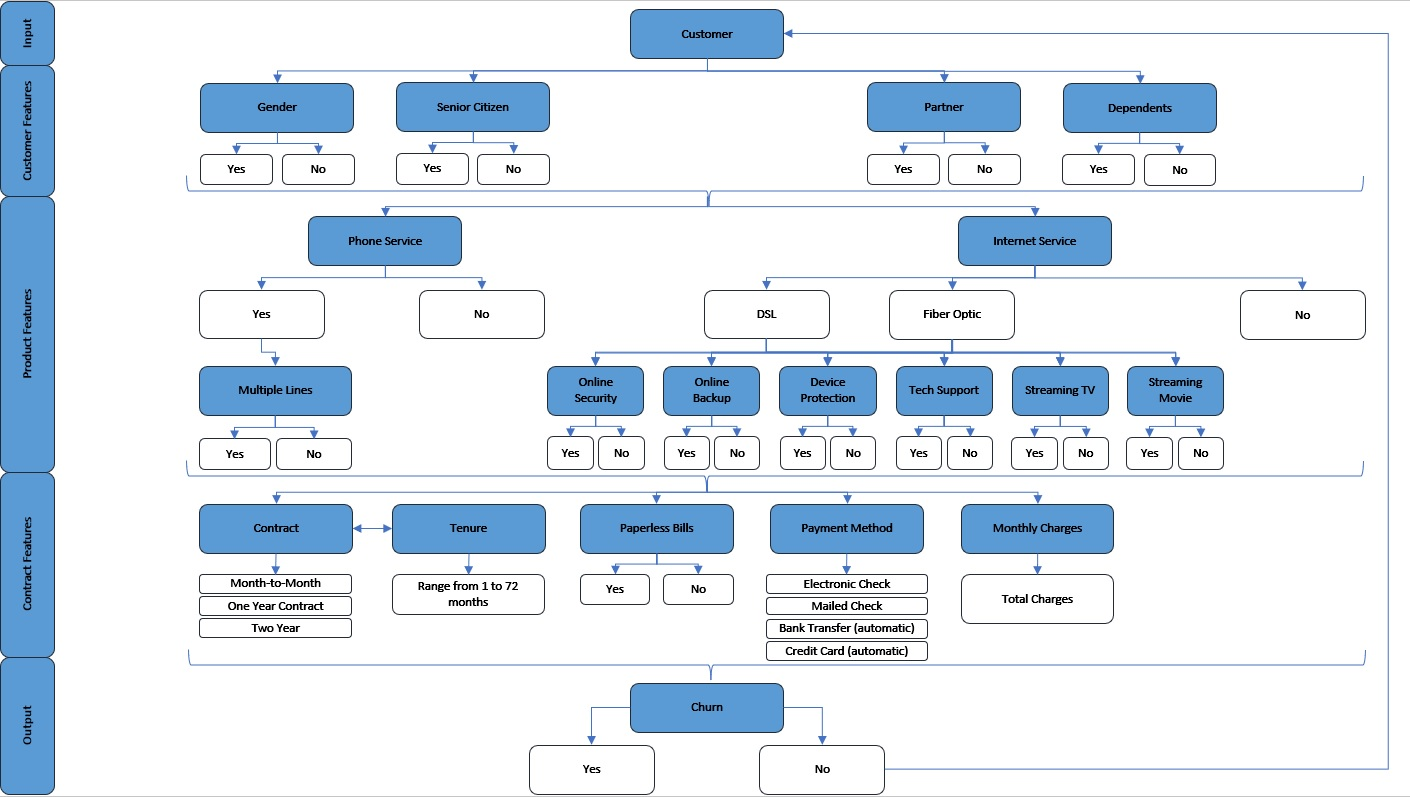

In [4]:
Image(filename =r'Diagram.jpg')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
data.shape

(7043, 21)

<a id='4.4'></a>
## 3.4. Descriptive Statistics

In [7]:
data.describe(include='all')

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043,7043,7043.000000,7043,7043,7043.000000,7043,7043,7043,7043,...,7043,7043,7043,7043,7043,7043,7043,7043.000000,7043,7043
unique,7043,2,NaN,2,2,NaN,2,3,3,3,...,3,3,3,3,3,2,4,NaN,6531,2
top,7590-VHVEG,Male,NaN,No,No,NaN,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,NaN,,No
freq,1,3555,NaN,3641,4933,NaN,6361,3390,3096,3498,...,3095,3473,2810,2785,3875,4171,2365,NaN,11,5174
mean,NaN,NaN,0.162147,NaN,NaN,32.371149,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64.761692,NaN,NaN
std,NaN,NaN,0.368612,NaN,NaN,24.559481,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.090047,NaN,NaN
min,NaN,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,18.250000,NaN,NaN
25%,NaN,NaN,0.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,35.500000,NaN,NaN
50%,NaN,NaN,0.000000,NaN,NaN,29.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,70.350000,NaN,NaN
75%,NaN,NaN,0.000000,NaN,NaN,55.000000,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89.850000,NaN,NaN


## 3.5. Data Visualisation

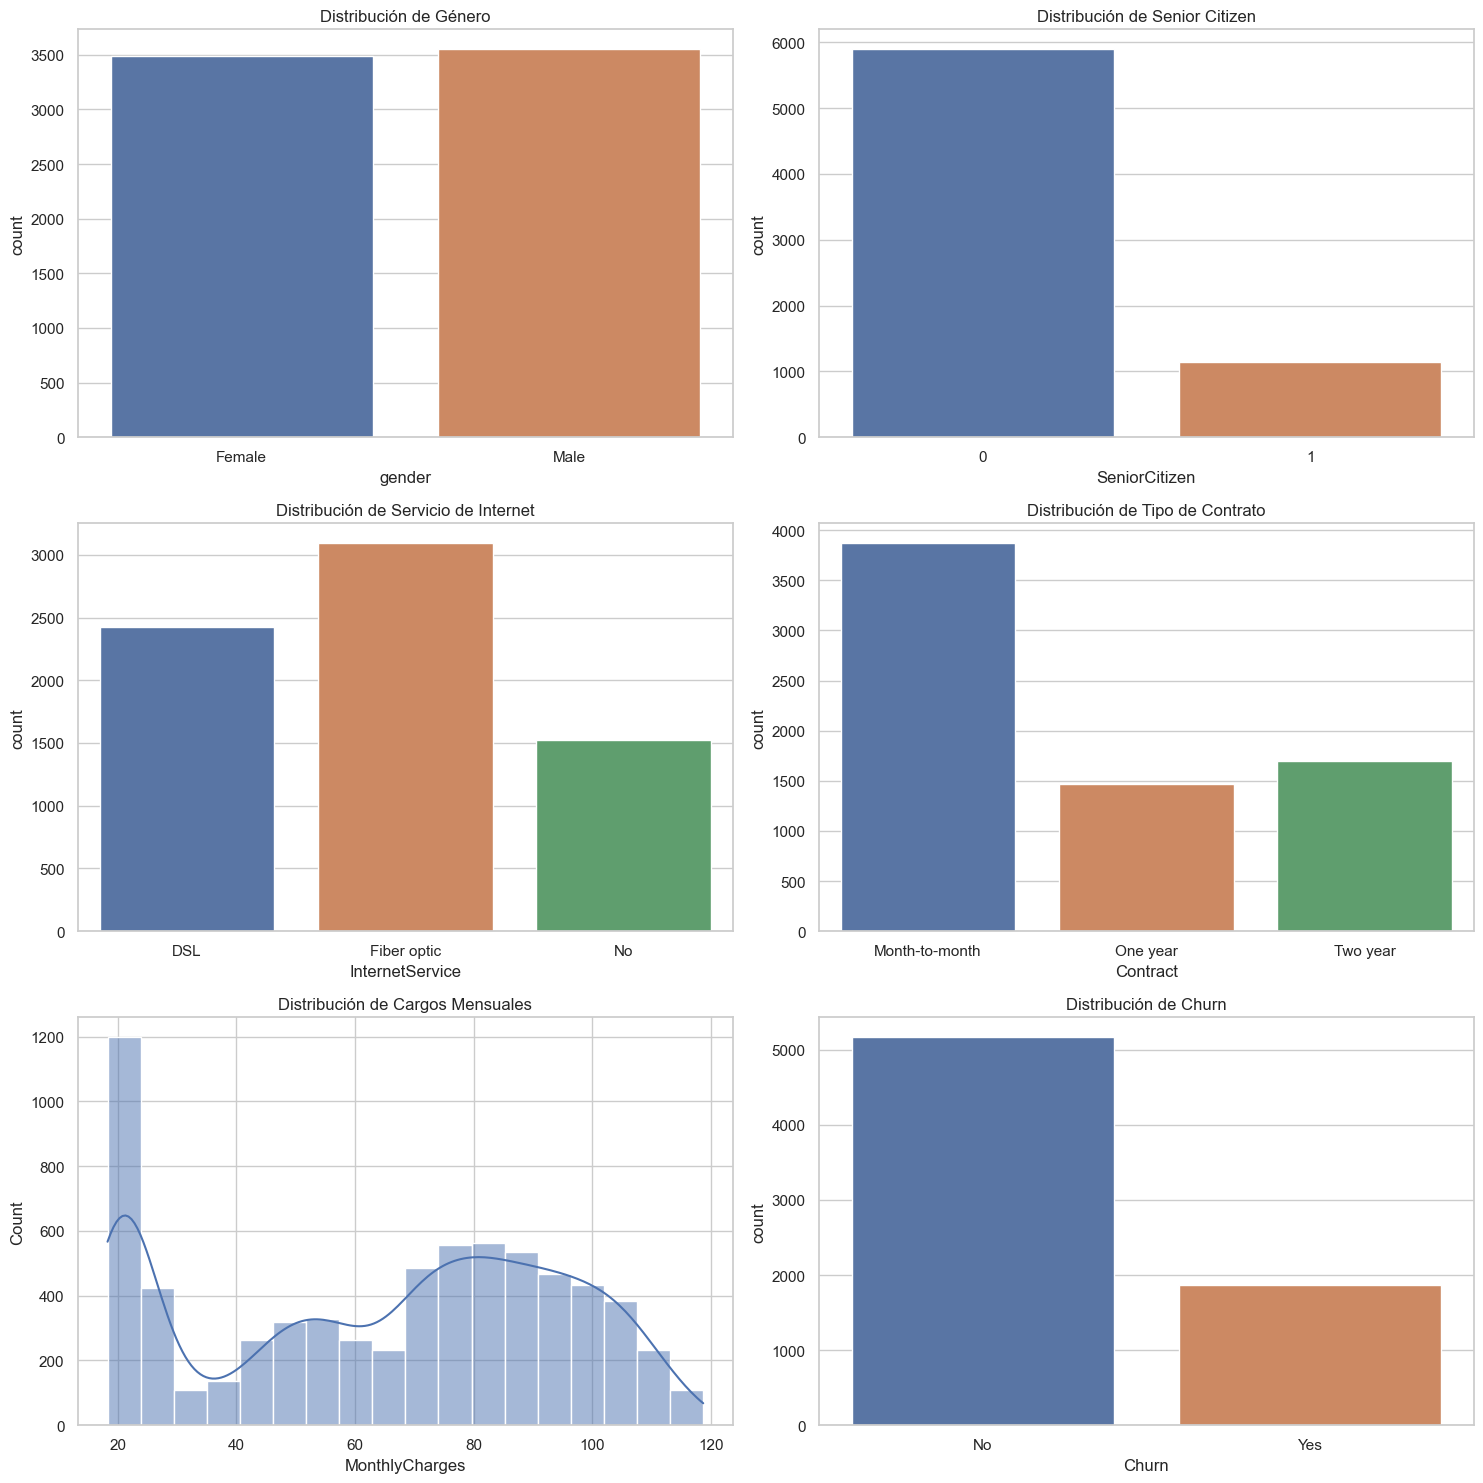

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración para los gráficos
sns.set(style="whitegrid")

# Crear una figura con múltiples subgráficos
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(15, 15))

# Distribución de Género
sns.countplot(x='gender', data=data, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Género')

# Distribución de SeniorCitizen
sns.countplot(x='SeniorCitizen', data=data, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Senior Citizen')

# Distribución de InternetService
sns.countplot(x='InternetService', data=data, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Servicio de Internet')

# Distribución de Contract
sns.countplot(x='Contract', data=data, ax=axes[1, 1])
axes[1, 1].set_title('Distribución de Tipo de Contrato')

# Distribución de MonthlyCharges
sns.histplot(data['MonthlyCharges'], kde=True, ax=axes[2, 0])
axes[2, 0].set_title('Distribución de Cargos Mensuales')

# Distribución de Churn
sns.countplot(x='Churn', data=data, ax=axes[2, 1])
axes[2, 1].set_title('Distribución de Churn')


plt.tight_layout()
plt.show()

# 4. Data Preparation

In [9]:
# Delete the "customerID" Column
data.drop('customerID', axis=1, inplace=True)

## 4.1 Categorical Columns

In [10]:
# Categorical Columns
categorical_cols = ['gender', 'SeniorCitizen', 'Dependents', 'Partner', 
                    'PhoneService', 'MultipleLines', 'InternetService', 
                    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                    'TechSupport', 'StreamingTV', 'StreamingMovies', 
                    'Contract', 'PaperlessBilling', 'PaymentMethod']

In [11]:
# One-Hot Encoding
data = pd.get_dummies(data, columns=categorical_cols)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 47 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   tenure                                   7043 non-null   int64  
 1   MonthlyCharges                           7043 non-null   float64
 2   TotalCharges                             7043 non-null   object 
 3   Churn                                    7043 non-null   object 
 4   gender_Female                            7043 non-null   uint8  
 5   gender_Male                              7043 non-null   uint8  
 6   SeniorCitizen_0                          7043 non-null   uint8  
 7   SeniorCitizen_1                          7043 non-null   uint8  
 8   Dependents_No                            7043 non-null   uint8  
 9   Dependents_Yes                           7043 non-null   uint8  
 10  Partner_No                               7043 no

In [13]:
# Non Categorical Columns
non_categorical_cols = ['tenure', 'MonthlyCharges', 'TotalCharges', 'Churn']

# Categorical Columns
categorical_encoded_cols = [col for col in data.columns if col not in non_categorical_cols]

# Chi-Square Categorical Columns
X_categorical = data[categorical_encoded_cols]
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)  

chi_scores = chi2(X_categorical, y)

print(chi_scores)

(array([2.63667886e-01, 2.58698618e-01, 2.60005870e+01, 1.34351545e+02,
       5.69038910e+01, 1.33036443e+02, 7.70024458e+01, 8.24120826e+01,
       9.07147852e-01, 9.72606249e-02, 3.87478204e+00, 9.07147852e-01,
       6.54851159e+00, 7.13131803e+01, 3.74476216e+02, 2.86520193e+02,
       4.16182917e+02, 2.86520193e+02, 1.47295858e+02, 2.84074903e+02,
       2.86520193e+02, 3.12176940e+01, 2.51672514e+02, 2.86520193e+02,
       2.02266622e+01, 4.06117093e+02, 2.86520193e+02, 1.35559783e+02,
       7.03495155e+01, 2.86520193e+02, 1.73342348e+01, 7.28987557e+01,
       2.86520193e+02, 1.62425307e+01, 5.19895311e+02, 1.76123171e+02,
       4.88578090e+02, 1.53480111e+02, 1.05680863e+02, 7.64859132e+01,
       9.95820574e+01, 4.26422767e+02, 4.56515896e+01]), array([6.07611392e-001, 6.11015635e-001, 3.41313557e-007, 4.57695863e-031,
       4.57639460e-014, 8.87672856e-031, 1.70746377e-018, 1.10476396e-019,
       3.40872312e-001, 7.55142091e-001, 4.90166739e-002, 3.40872312e-001,
       

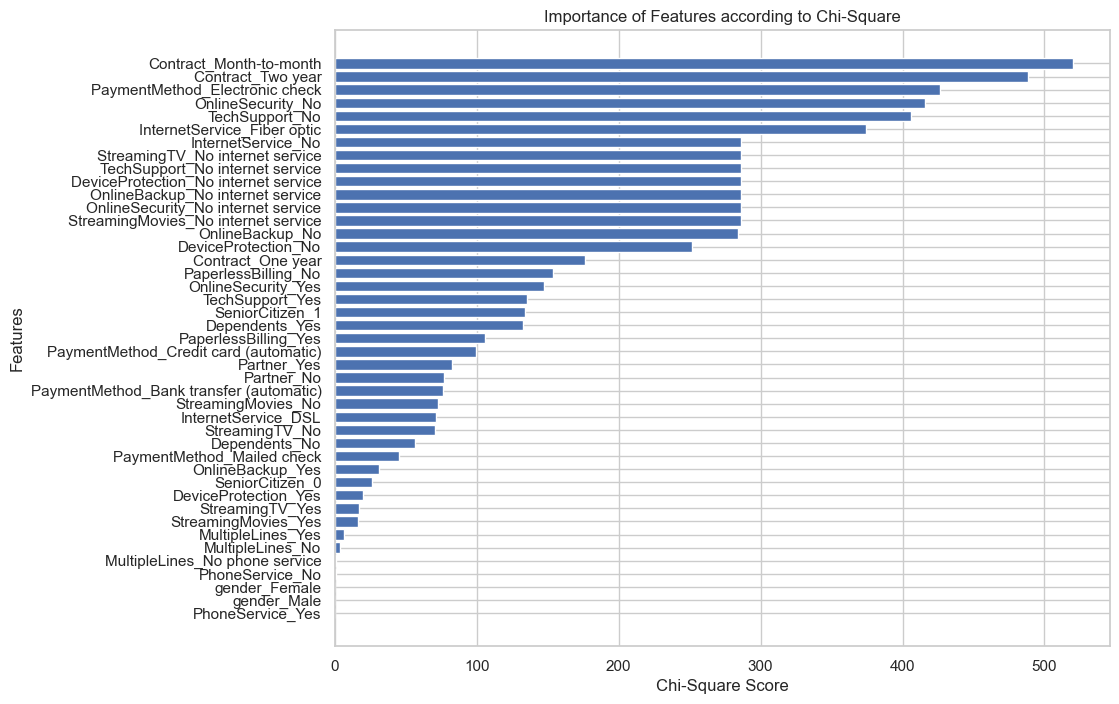

In [14]:
# DataFrame
chi_results = pd.DataFrame({
    'Features': categorical_encoded_cols,
    'Score': chi_scores[0]
})

chi_sorted = chi_results.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 8))
plt.barh(chi_sorted['Features'], chi_sorted['Score'])
plt.xlabel('Chi-Square Score')
plt.ylabel('Features')
plt.title('Importance of Features according to Chi-Square')
plt.gca().invert_yaxis()
plt.show()

## 4.2 Numerical Columns

In [15]:
# Numeric Columns
numeric_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

In [16]:
# Null Values

for col in ['tenure', 'MonthlyCharges', 'TotalCharges']:
    data[col] = data[col].replace(' ', np.nan)

In [17]:
null_values = data[numeric_cols].isnull().sum()
print(null_values)

tenure             0
MonthlyCharges     0
TotalCharges      11
dtype: int64


In [18]:
# Median
data['TotalCharges'].fillna(data['TotalCharges'].median(), inplace=True)

In [19]:
# StandardScaler Numercial Variables
scaler = StandardScaler()

data[numeric_cols] = scaler.fit_transform(data[numeric_cols])

In [20]:
print(data[['tenure', 'MonthlyCharges', 'TotalCharges']].head())

     tenure  MonthlyCharges  TotalCharges
0 -1.277445       -1.160323     -0.994242
1  0.066327       -0.259629     -0.173244
2 -1.236724       -0.362660     -0.959674
3  0.514251       -0.746535     -0.194766
4 -1.236724        0.197365     -0.940470


In [21]:
# ANOVA Numerical Variables
X_numeric = data[numeric_cols]  
y = data['Churn']

anova_scores = f_classif(X_numeric, y)

print(anova_scores)

(array([997.2680105 , 273.46370421, 290.43983088]), array([7.99905796e-205, 2.70664561e-060, 7.50860906e-064]))


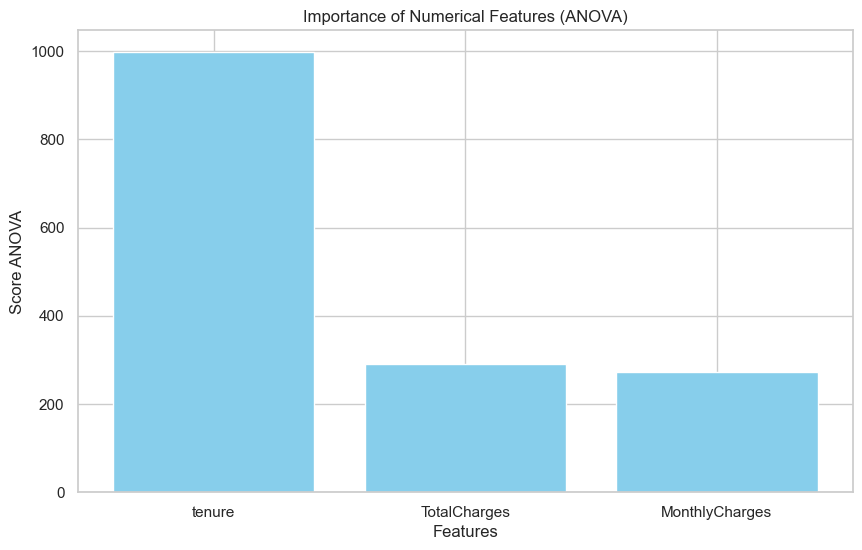

In [22]:
# Numeric Features
numeric_feature_names = ['tenure', 'MonthlyCharges', 'TotalCharges']

# DataFrame
anova_results = pd.DataFrame({
    'Features': numeric_feature_names,
    'Score': anova_scores[0]
})

anova_sorted = anova_results.sort_values('Score', ascending=False)

plt.figure(figsize=(10, 6))
plt.bar(anova_sorted['Features'], anova_sorted['Score'], color='skyblue')
plt.xlabel('Features')
plt.ylabel('Score ANOVA')
plt.title('Importance of Numerical Features (ANOVA)')
plt.show()

# 5. Modeling

## 5.1 Train / Test Split (80-20)

In [23]:
# Split predictive variables and target variable
X = data.drop('Churn', axis=1)
y = data['Churn'].apply(lambda x: 1 if x == 'Yes' else 0)

# Train / Test Split (80-20)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(5634, 46) (1409, 46) (5634,) (1409,)


In [24]:
y_train.value_counts()

0    4113
1    1521
Name: Churn, dtype: int64

## 5.2 Logistic Regression Model with  Hyper-Tuning, GridSearchCV and Cross-Validation

In [25]:
# Logistic Regression Model
log_reg = LogisticRegression()

# Hyper-Tuning Parameters
param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']
}

# GridSearchCV
grid_search = GridSearchCV(log_reg, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


GridSearchCV(cv=5, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear']},
             scoring='accuracy', verbose=1)

## 5.3 Model evaluation

In [26]:
# Prediction Test
y_pred = grid_search.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.89      0.88      1061
           1       0.63      0.59      0.61       348

    accuracy                           0.81      1409
   macro avg       0.75      0.74      0.74      1409
weighted avg       0.81      0.81      0.81      1409

[[940 121]
 [144 204]]


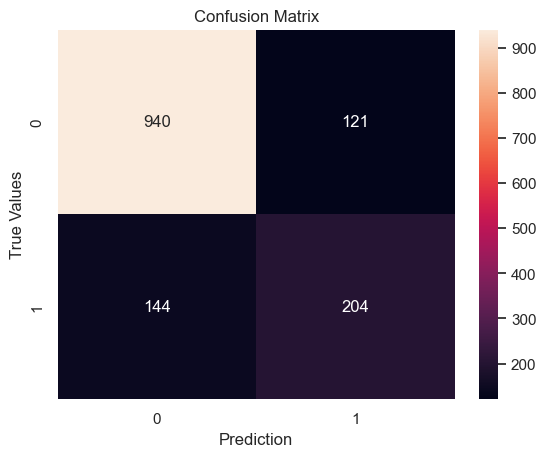

In [27]:
# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()

## 5.4 Random Forest Model with  Hyper-Tuning, GridSearchCV and Cross-Validation

In [28]:
# Random Forest Model
rf = RandomForestClassifier()

# # Hyper-Tuning Parameters
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [4, 6, 8, 10],
    'criterion': ['gini', 'entropy']
}

# GridSearchCV
grid_search = GridSearchCV(rf, param_grid, cv=5, scoring='accuracy', verbose=1)

grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 6, 8, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=1)

## 5.5 Model evaluation

In [29]:
# Prediction Test
y_pred = grid_search.predict(X_test)

# Classification Report
print(classification_report(y_test, y_pred))

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

              precision    recall  f1-score   support

           0       0.87      0.90      0.88      1061
           1       0.65      0.58      0.62       348

    accuracy                           0.82      1409
   macro avg       0.76      0.74      0.75      1409
weighted avg       0.81      0.82      0.82      1409

[[952 109]
 [145 203]]


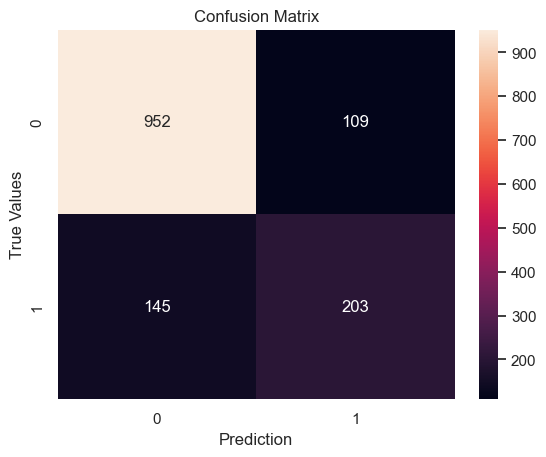

In [30]:
# Confusion Matrix
sns.heatmap(conf_matrix, annot=True, fmt='g')
plt.xlabel('Prediction')
plt.ylabel('True Values')
plt.title('Confusion Matrix')
plt.show()